In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
sns.set_context("talk")

# Load data
df = pd.read_csv('extractability_analysis_results_v7.csv')

# Filter only successful analyses
df_success = df[df['analysis_status'] == 'success'].copy()

print(f"Total repositories analyzed: {len(df)}")
print(f"Successful analyses: {len(df_success)}")
print(f"Failed analyses: {len(df) - len(df_success)}")

Total repositories analyzed: 73
Successful analyses: 71
Failed analyses: 2


TOP 10 MOST EXTRACTABLE REPOSITORIES

SegmentationBLWX/cssegmentation
  Score: 63.75/100
  Files: 118
  Modularity: 0.659
  Registries: 1
  Config System: True

Lightning-Universe/lightning-transformers
  Score: 61.48/100
  Files: 95
  Modularity: 0.525
  Registries: 0
  Config System: True

qubvel-org/segmentation_models.pytorch
  Score: 60.81/100
  Files: 131
  Modularity: 0.581
  Registries: 0
  Config System: False

frankkramer-lab/MIScnn
  Score: 59.98/100
  Files: 70
  Modularity: 0.602
  Registries: 2
  Config System: False

SegmentationBLWX/sssegmentation
  Score: 56.83/100
  Files: 833
  Modularity: 0.615
  Registries: 1
  Config System: True

lightly-ai/lightly
  Score: 55.98/100
  Files: 749
  Modularity: 0.579
  Registries: 26
  Config System: True

deepinv/deepinv
  Score: 55.88/100
  Files: 270
  Modularity: 0.472
  Registries: 2
  Config System: False

vturrisi/solo-learn
  Score: 53.94/100
  Files: 148
  Modularity: 0.529
  Registries: 27
  Config System: True

discover

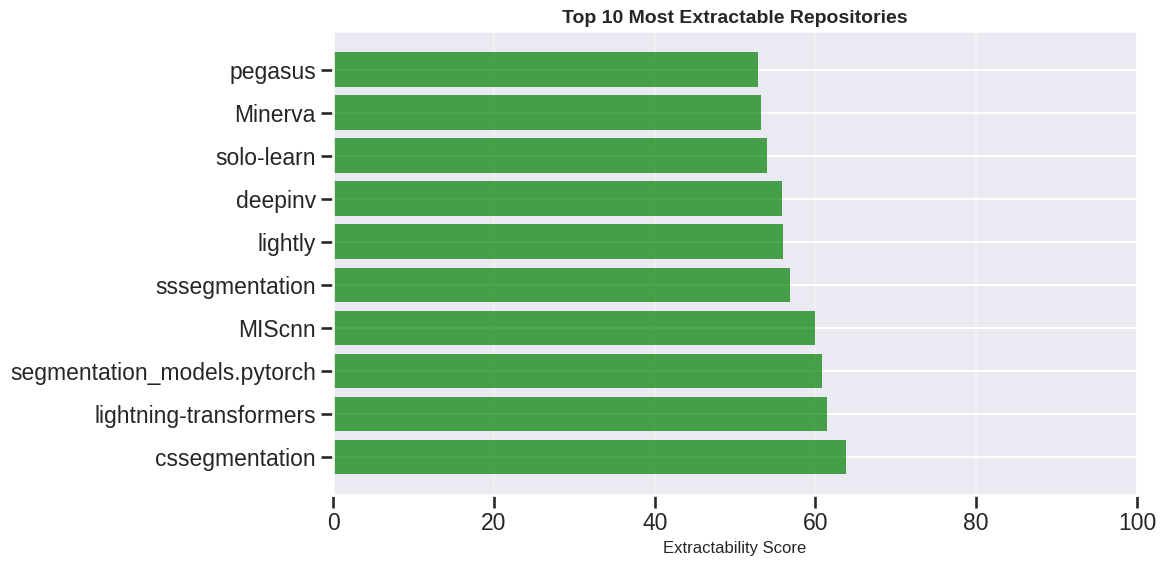

In [2]:
# Cell 2: Top 10 Best Extractability Scores
print("=" * 80)
print("TOP 10 MOST EXTRACTABLE REPOSITORIES")
print("=" * 80)

top10 = df_success.nlargest(10, 'extractability_score')[
    ['repo_name', 'extractability_score', 'total_python_files', 
     'modularity_score', 'registry_pattern_usage', 'has_config_system']
]

for idx, row in top10.iterrows():
    print(f"\n{row['repo_name']}")
    print(f"  Score: {row['extractability_score']:.2f}/100")
    print(f"  Files: {row['total_python_files']}")
    print(f"  Modularity: {row['modularity_score']:.3f}")
    print(f"  Registries: {row['registry_pattern_usage']}")
    print(f"  Config System: {row['has_config_system']}")

# Create bar chart
plt.figure(figsize=(12, 6))
plt.barh(top10['repo_name'].str.split('/').str[-1], top10['extractability_score'], color='green', alpha=0.7)
plt.xlabel('Extractability Score', fontsize=12)
plt.title('Top 10 Most Extractable Repositories', fontsize=14, fontweight='bold')
plt.xlim(0, 100)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

TOP 10 LEAST EXTRACTABLE REPOSITORIES

tensorflow/tensor2tensor
  Score: 7.61/100
  Files: 453
  Coupling: 0.672
  Registries: 1434
  Config System: True

google-research/scenic
  Score: 18.86/100
  Files: 937
  Coupling: 0.428
  Registries: 203
  Config System: True

pytorch/pytorch
  Score: 19.43/100
  Files: 4108
  Coupling: 0.356
  Registries: 2733
  Config System: True

NVIDIA-NeMo/NeMo
  Score: 24.50/100
  Files: 2432
  Coupling: 0.286
  Registries: 208
  Config System: True

ludwig-ai/ludwig
  Score: 25.60/100
  Files: 654
  Coupling: 0.243
  Registries: 616
  Config System: True

apple/coremltools
  Score: 26.72/100
  Files: 789
  Coupling: 0.172
  Registries: 1467
  Config System: True

microsoft/unilm
  Score: 26.73/100
  Files: 3934
  Coupling: 0.333
  Registries: 2727
  Config System: True

facebookresearch/fairseq
  Score: 26.98/100
  Files: 1021
  Coupling: 0.274
  Registries: 839
  Config System: True

apple/corenet
  Score: 27.36/100
  Files: 498
  Coupling: 0.359
  Reg

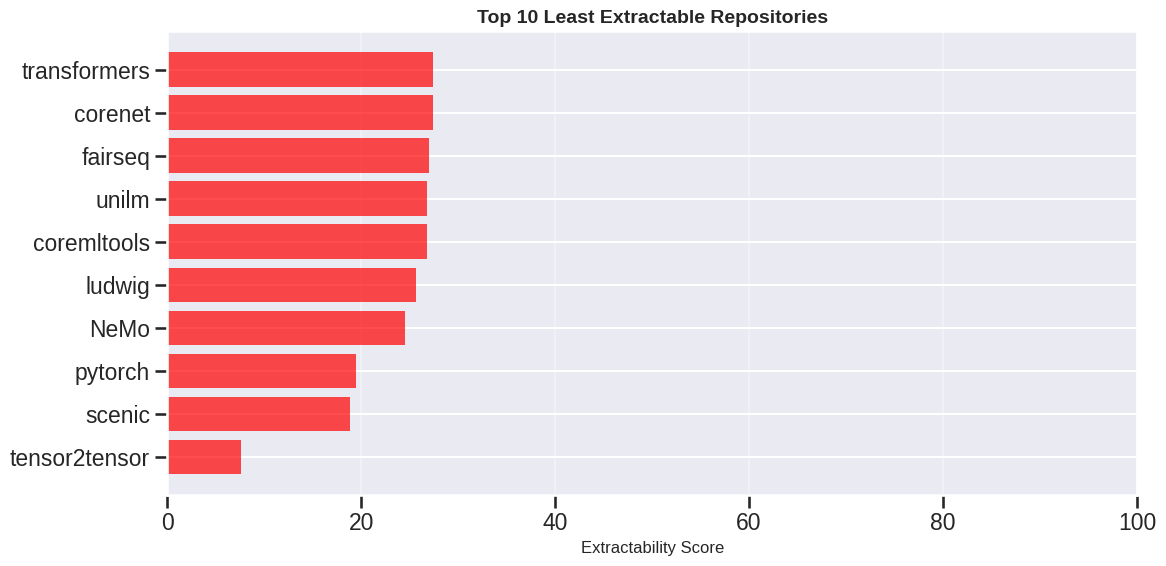

In [3]:
# Cell 3: Bottom 10 Worst Extractability Scores
print("=" * 80)
print("TOP 10 LEAST EXTRACTABLE REPOSITORIES")
print("=" * 80)

bottom10 = df_success.nsmallest(10, 'extractability_score')[
    ['repo_name', 'extractability_score', 'total_python_files', 
     'coupling_score', 'registry_pattern_usage', 'has_config_system']
]

for idx, row in bottom10.iterrows():
    print(f"\n{row['repo_name']}")
    print(f"  Score: {row['extractability_score']:.2f}/100")
    print(f"  Files: {row['total_python_files']}")
    print(f"  Coupling: {row['coupling_score']:.3f}")
    print(f"  Registries: {row['registry_pattern_usage']}")
    print(f"  Config System: {row['has_config_system']}")

# Create bar chart
plt.figure(figsize=(12, 6))
plt.barh(bottom10['repo_name'].str.split('/').str[-1], bottom10['extractability_score'], color='red', alpha=0.7)
plt.xlabel('Extractability Score', fontsize=12)
plt.title('Top 10 Least Extractable Repositories', fontsize=14, fontweight='bold')
plt.xlim(0, 100)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

EXTRACTABILITY SCORE DISTRIBUTION

Mean Score: 39.46
Median Score: 38.28
Std Dev: 11.10
Min Score: 7.61
Max Score: 63.75

Score Distribution by Range:
  Excellent (70-100): 0 repos (0.0%)
  Very Good (60-70): 3 repos (4.2%)
  Good (50-60): 11 repos (15.5%)
  Moderate (40-50): 19 repos (26.8%)
  Challenging (30-40): 24 repos (33.8%)
  Difficult (20-30): 11 repos (15.5%)
  Very Difficult (0-20): 3 repos (4.2%)


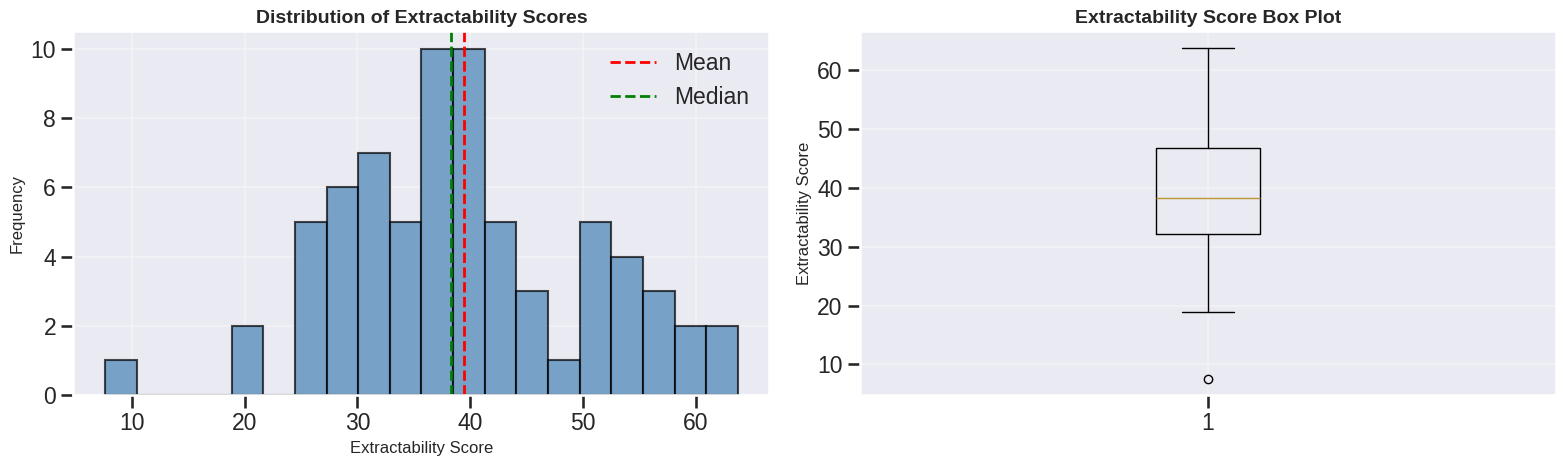

In [4]:
# Cell 4: Score Distribution
print("=" * 80)
print("EXTRACTABILITY SCORE DISTRIBUTION")
print("=" * 80)

print(f"\nMean Score: {df_success['extractability_score'].mean():.2f}")
print(f"Median Score: {df_success['extractability_score'].median():.2f}")
print(f"Std Dev: {df_success['extractability_score'].std():.2f}")
print(f"Min Score: {df_success['extractability_score'].min():.2f}")
print(f"Max Score: {df_success['extractability_score'].max():.2f}")

# Score ranges
print("\nScore Distribution by Range:")
ranges = [
    (70, 100, "Excellent (70-100)"),
    (60, 70, "Very Good (60-70)"),
    (50, 60, "Good (50-60)"),
    (40, 50, "Moderate (40-50)"),
    (30, 40, "Challenging (30-40)"),
    (20, 30, "Difficult (20-30)"),
    (0, 20, "Very Difficult (0-20)")
]

for low, high, label in ranges:
    count = len(df_success[(df_success['extractability_score'] >= low) & 
                           (df_success['extractability_score'] < high)])
    pct = (count / len(df_success)) * 100
    print(f"  {label}: {count} repos ({pct:.1f}%)")

# Histogram
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histogram
axes[0].hist(df_success['extractability_score'], bins=20, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].axvline(df_success['extractability_score'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].axvline(df_success['extractability_score'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0].set_xlabel('Extractability Score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Extractability Scores', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df_success['extractability_score'], vert=True)
axes[1].set_ylabel('Extractability Score', fontsize=12)
axes[1].set_title('Extractability Score Box Plot', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

REGISTRY PATTERN USAGE ANALYSIS

Extractability by Registry Usage:
                  extractability_score              registry_pattern_usage
                                  mean median count                   mean
registry_category                                                         
Minimal (0-10)                   47.00  42.82    19                   1.68
Low (11-50)                      48.04  49.78    15                  25.60
Moderate (51-200)                37.52  37.54    18                 112.72
Heavy (200+)                     27.00  27.43    19                 819.37


/tmp/ipykernel_15421/3405185815.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  registry_stats = df_success.groupby('registry_category').agg({


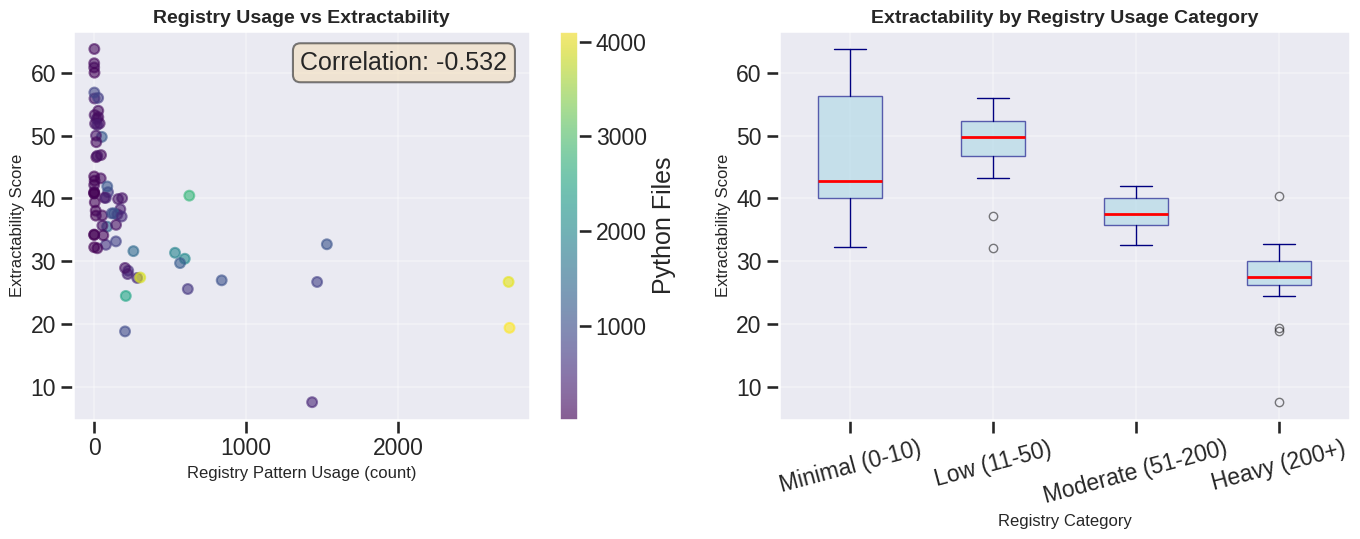


REPOSITORIES WITH HIGHEST REGISTRY USAGE
                   repo_name  registry_pattern_usage  extractability_score  total_python_files
             pytorch/pytorch                    2733                 19.43                4108
             microsoft/unilm                    2727                 26.73                3934
facebookincubator/AITemplate                    1531                 32.71                1063
           apple/coremltools                    1467                 26.72                 789
    tensorflow/tensor2tensor                    1434                  7.61                 453
    facebookresearch/fairseq                     839                 26.98                1021
    open-compass/opencompass                     626                 40.44                2737
            ludwig-ai/ludwig                     616                 25.60                 654
      open-mmlab/mmdetection                     596                 30.41                1957
        

In [5]:
# Cell 5: Registry Pattern Impact
print("=" * 80)
print("REGISTRY PATTERN USAGE ANALYSIS")
print("=" * 80)

# Categorize by registry usage
df_success['registry_category'] = pd.cut(
    df_success['registry_pattern_usage'],
    bins=[-1, 10, 50, 200, 10000],
    labels=['Minimal (0-10)', 'Low (11-50)', 'Moderate (51-200)', 'Heavy (200+)']
)

registry_stats = df_success.groupby('registry_category').agg({
    'extractability_score': ['mean', 'median', 'count'],
    'registry_pattern_usage': 'mean'
}).round(2)

print("\nExtractability by Registry Usage:")
print(registry_stats)

# Scatter plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_success['registry_pattern_usage'], 
           df_success['extractability_score'], 
           alpha=0.6, s=50, c=df_success['total_python_files'], 
           cmap='viridis')
plt.colorbar(label='Python Files')
plt.xlabel('Registry Pattern Usage (count)', fontsize=12)
plt.ylabel('Extractability Score', fontsize=12)
plt.title('Registry Usage vs Extractability', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

# Add correlation
corr = df_success['registry_pattern_usage'].corr(df_success['extractability_score'])
plt.text(0.95, 0.95, f'Correlation: {corr:.3f}', 
         transform=plt.gca().transAxes, 
         ha='right', va='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.subplot(1, 2, 2)
df_success.boxplot(
    column='extractability_score',
    by='registry_category',
    ax=plt.gca(),
    patch_artist=True,  # allows coloring the boxes
    boxprops=dict(facecolor='lightblue', color='navy', alpha=0.6),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='navy'),
    capprops=dict(color='navy'),
    flierprops=dict(marker='o', color='gray', alpha=0.5)
)
plt.xlabel('Registry Category', fontsize=12)
plt.ylabel('Extractability Score', fontsize=12)
plt.title('Extractability by Registry Usage Category', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=15)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Top registry users
print("\n" + "=" * 80)
print("REPOSITORIES WITH HIGHEST REGISTRY USAGE")
print("=" * 80)
top_registry = df_success.nlargest(10, 'registry_pattern_usage')[
    ['repo_name', 'registry_pattern_usage', 'extractability_score', 'total_python_files']
]
print(top_registry.to_string(index=False))

MODULARITY ANALYSIS

Extractability by Modularity:
                    extractability_score              modularity_score
                                    mean median count             mean
modularity_category                                                   
Low (0-0.3)                         7.61   7.61     1             0.26
Moderate (0.3-0.4)                 37.47  37.39     8             0.36
Good (0.4-0.5)                     37.30  37.29    37             0.46
Excellent (0.5+)                   44.58  42.82    25             0.55


/tmp/ipykernel_15421/4124059005.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  modularity_stats = df_success.groupby('modularity_category').agg({


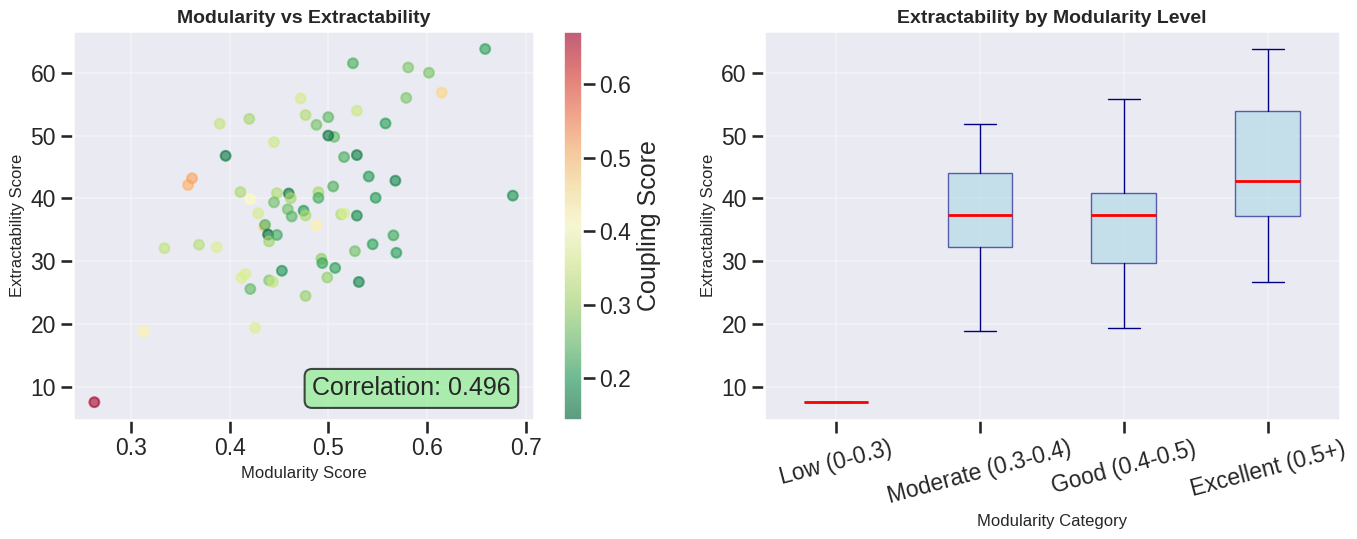

In [6]:
# Cell 6: Modularity Impact
print("=" * 80)
print("MODULARITY ANALYSIS")
print("=" * 80)

# Categorize by modularity
df_success['modularity_category'] = pd.cut(
    df_success['modularity_score'],
    bins=[0, 0.3, 0.4, 0.5, 1.0],
    labels=['Low (0-0.3)', 'Moderate (0.3-0.4)', 'Good (0.4-0.5)', 'Excellent (0.5+)']
)

modularity_stats = df_success.groupby('modularity_category').agg({
    'extractability_score': ['mean', 'median', 'count'],
    'modularity_score': 'mean'
}).round(2)

print("\nExtractability by Modularity:")
print(modularity_stats)

# Scatter plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_success['modularity_score'], 
           df_success['extractability_score'], 
           alpha=0.6, s=50, c=df_success['coupling_score'], 
           cmap='RdYlGn_r')
plt.colorbar(label='Coupling Score')
plt.xlabel('Modularity Score', fontsize=12)
plt.ylabel('Extractability Score', fontsize=12)
plt.title('Modularity vs Extractability', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

# Add correlation
corr = df_success['modularity_score'].corr(df_success['extractability_score'])
plt.text(0.95, 0.05, f'Correlation: {corr:.3f}', 
         transform=plt.gca().transAxes, 
         ha='right', va='bottom',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.subplot(1, 2, 2)
df_success.boxplot(column='extractability_score', by='modularity_category', ax=plt.gca(),
                   patch_artist=True,  # allows coloring the boxes
    boxprops=dict(facecolor='lightblue', color='navy', alpha=0.6),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='navy'),
    capprops=dict(color='navy'),
    flierprops=dict(marker='o', color='gray', alpha=0.5)
                   )
plt.xlabel('Modularity Category', fontsize=12)
plt.ylabel('Extractability Score', fontsize=12)
plt.title('Extractability by Modularity Level', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xticks(rotation=15)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

REPOSITORY SIZE ANALYSIS

Metrics by Repository Size:
                  extractability_score              total_python_files  \
                                  mean median count               mean   
size_category                                                            
Small (0-100)                    41.16  40.44    18              49.94   
Medium (100-300)                 47.04  48.94    21             189.48   
Large (300-700)                  31.69  30.56    10             479.10   
Very Large (700+)                34.38  32.16    22            1637.23   

                  internal_dependencies registry_pattern_usage  
                                   mean                   mean  
size_category                                                   
Small (0-100)                     13.11                  10.72  
Medium (100-300)                  41.24                  57.19  
Large (300-700)                  150.70                 330.50  
Very Large (700+)                199.

/tmp/ipykernel_15421/828273287.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_stats = df_success.groupby('size_category').agg({


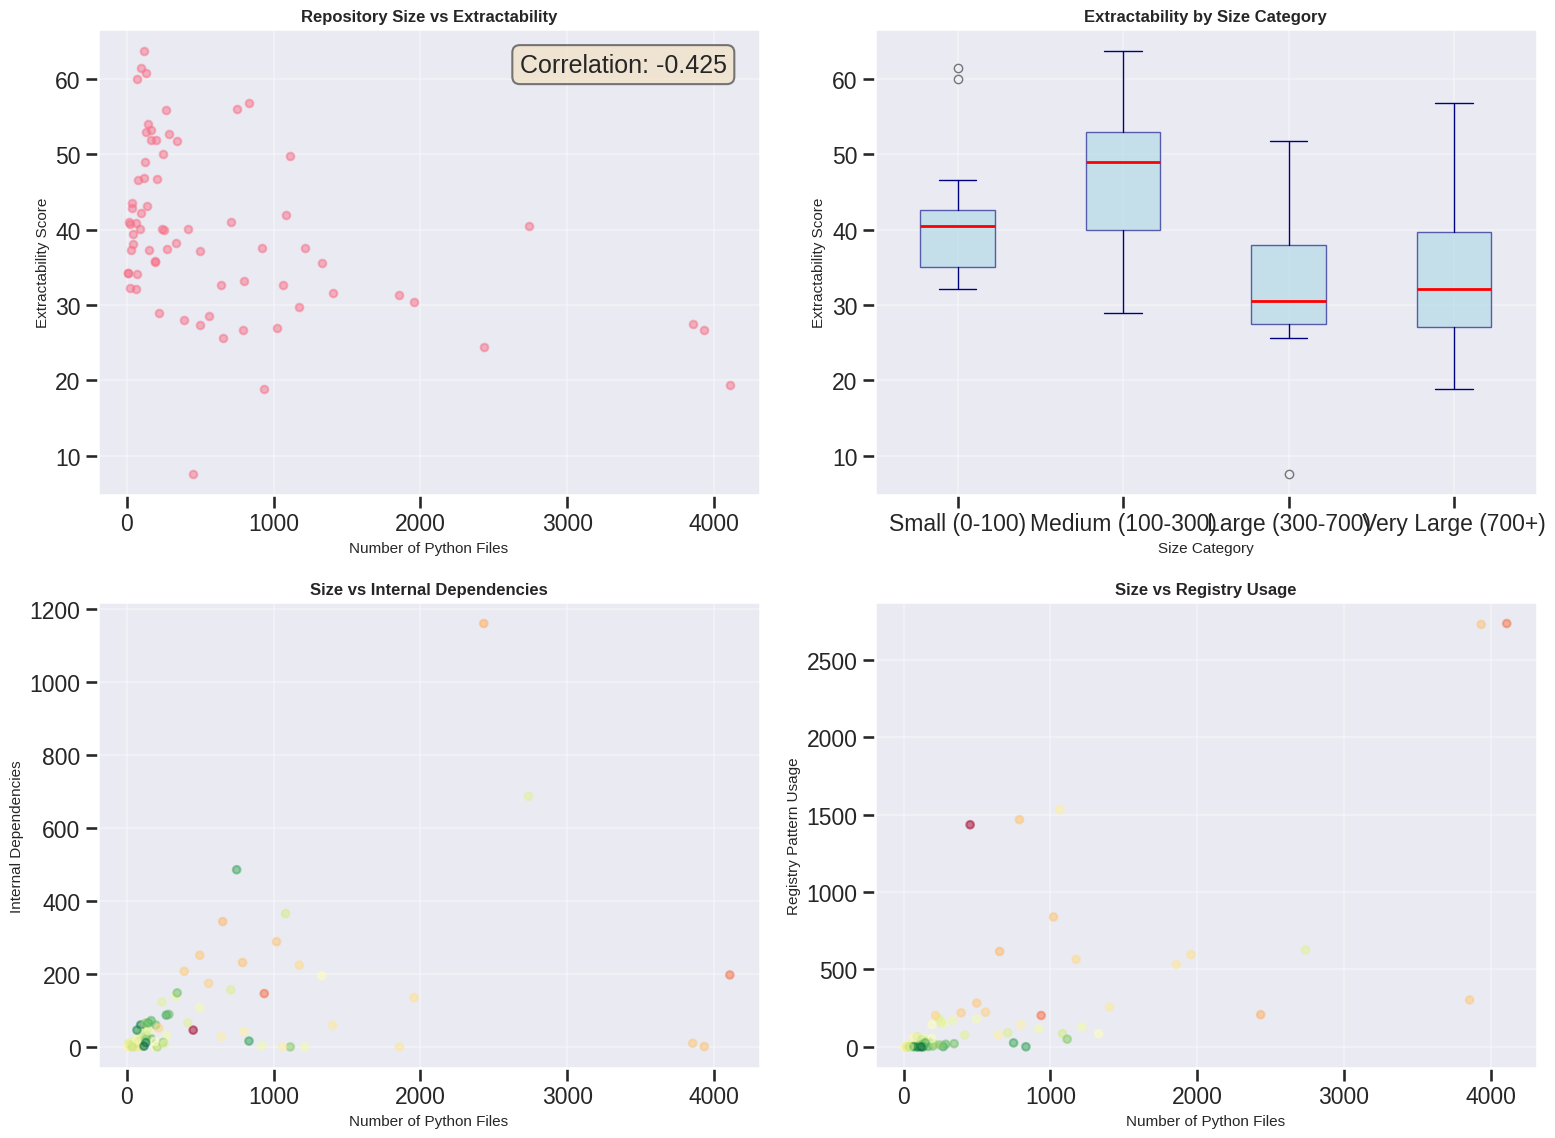

In [7]:
# Cell 7: Repository Size Impact
print("=" * 80)
print("REPOSITORY SIZE ANALYSIS")
print("=" * 80)

# Categorize by size
df_success['size_category'] = pd.cut(
    df_success['total_python_files'],
    bins=[0, 100, 300, 700, 10000],
    labels=['Small (0-100)', 'Medium (100-300)', 'Large (300-700)', 'Very Large (700+)']
)

size_stats = df_success.groupby('size_category').agg({
    'extractability_score': ['mean', 'median', 'count'],
    'total_python_files': 'mean',
    'internal_dependencies': 'mean',
    'registry_pattern_usage': 'mean'
}).round(2)

print("\nMetrics by Repository Size:")
print(size_stats)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Scatter: Size vs Score
axes[0, 0].scatter(df_success['total_python_files'], 
                   df_success['extractability_score'],
                   alpha=0.5, s=30)
axes[0, 0].set_xlabel('Number of Python Files', fontsize=11)
axes[0, 0].set_ylabel('Extractability Score', fontsize=11)
axes[0, 0].set_title('Repository Size vs Extractability', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

corr = df_success['total_python_files'].corr(df_success['extractability_score'])
axes[0, 0].text(0.95, 0.95, f'Correlation: {corr:.3f}', 
                transform=axes[0, 0].transAxes, 
                ha='right', va='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Box plot by size category
df_success.boxplot(column='extractability_score', by='size_category', ax=axes[0, 1],
                   patch_artist=True,  # allows coloring the boxes
    boxprops=dict(facecolor='lightblue', color='navy', alpha=0.6),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='navy'),
    capprops=dict(color='navy'),
    flierprops=dict(marker='o', color='gray', alpha=0.5)
                   )
axes[0, 1].set_xlabel('Size Category', fontsize=11)
axes[0, 1].set_ylabel('Extractability Score', fontsize=11)
axes[0, 1].set_title('Extractability by Size Category', fontsize=12, fontweight='bold')
axes[0, 1].get_figure().suptitle('')
axes[0, 1].grid(alpha=0.3)

# Internal dependencies by size
axes[1, 0].scatter(df_success['total_python_files'], 
                   df_success['internal_dependencies'],
                   alpha=0.5, s=30, c=df_success['extractability_score'],
                   cmap='RdYlGn')
axes[1, 0].set_xlabel('Number of Python Files', fontsize=11)
axes[1, 0].set_ylabel('Internal Dependencies', fontsize=11)
axes[1, 0].set_title('Size vs Internal Dependencies', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Registry usage by size
axes[1, 1].scatter(df_success['total_python_files'], 
                   df_success['registry_pattern_usage'],
                   alpha=0.5, s=30, c=df_success['extractability_score'],
                   cmap='RdYlGn')
axes[1, 1].set_xlabel('Number of Python Files', fontsize=11)
axes[1, 1].set_ylabel('Registry Pattern Usage', fontsize=11)
axes[1, 1].set_title('Size vs Registry Usage', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

CONFIGURATION SYSTEM IMPACT

Metrics by Config System Presence:
                  extractability_score                      \
                                  mean median    std count   
has_config_system                                            
False                            45.35  42.10   9.94    10   
True                             38.50  37.62  11.06    61   

                  registry_pattern_usage coupling_score modularity_score  
                                    mean           mean             mean  
has_config_system                                                         
False                              20.40           0.28             0.47  
True                              291.95           0.28             0.48  

WELL-DESIGNED REPOS WITH CONFIG SYSTEMS (low registry usage):
                                repo_name  extractability_score  registry_pattern_usage  modularity_score
          SegmentationBLWX/cssegmentation                 63.75                  

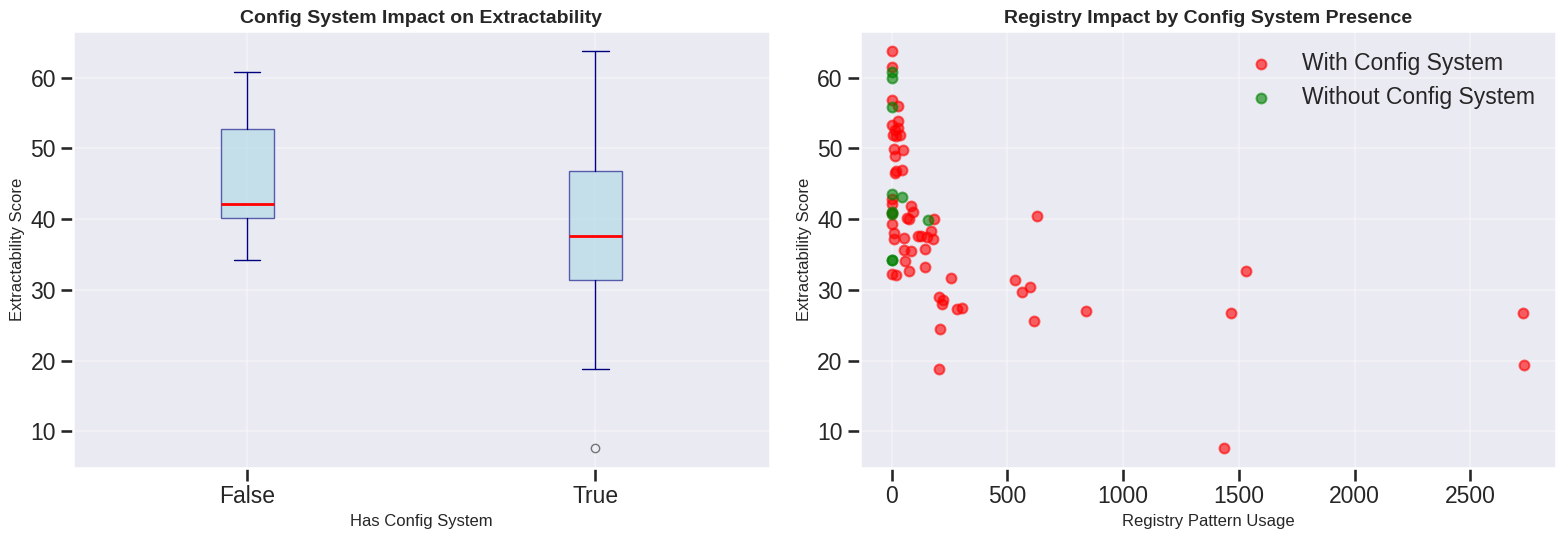

In [8]:
# Cell 8: Config System Impact
print("=" * 80)
print("CONFIGURATION SYSTEM IMPACT")
print("=" * 80)

config_comparison = df_success.groupby('has_config_system').agg({
    'extractability_score': ['mean', 'median', 'std', 'count'],
    'registry_pattern_usage': 'mean',
    'coupling_score': 'mean',
    'modularity_score': 'mean'
}).round(2)

print("\nMetrics by Config System Presence:")
print(config_comparison)

# Repos with configs but low registries (good design)
good_configs = df_success[
    (df_success['has_config_system'] == True) & 
    (df_success['registry_pattern_usage'] < 50)
].nlargest(5, 'extractability_score')[
    ['repo_name', 'extractability_score', 'registry_pattern_usage', 'modularity_score']
]

print("\n" + "=" * 80)
print("WELL-DESIGNED REPOS WITH CONFIG SYSTEMS (low registry usage):")
print("=" * 80)
print(good_configs.to_string(index=False))

# Repos with configs AND heavy registries (problematic)
bad_configs = df_success[
    (df_success['has_config_system'] == True) & 
    (df_success['registry_pattern_usage'] > 200)
].nsmallest(5, 'extractability_score')[
    ['repo_name', 'extractability_score', 'registry_pattern_usage', 'coupling_score']
]

print("\n" + "=" * 80)
print("PROBLEMATIC REPOS (config + heavy registries):")
print("=" * 80)
print(bad_configs.to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot comparison
df_success.boxplot(column='extractability_score', by='has_config_system', ax=axes[0],
                patch_artist=True,  # allows coloring the boxes
    boxprops=dict(facecolor='lightblue', color='navy', alpha=0.6),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='navy'),
    capprops=dict(color='navy'),
    flierprops=dict(marker='o', color='gray', alpha=0.5)
                
                )
axes[0].set_xlabel('Has Config System', fontsize=12)
axes[0].set_ylabel('Extractability Score', fontsize=12)
axes[0].set_title('Config System Impact on Extractability', fontsize=14, fontweight='bold')
axes[0].get_figure().suptitle('')
axes[0].grid(alpha=0.3)

# Scatter: Config + Registry interaction
config_yes = df_success[df_success['has_config_system'] == True]
config_no = df_success[df_success['has_config_system'] == False]

axes[1].scatter(config_yes['registry_pattern_usage'], 
               config_yes['extractability_score'],
               alpha=0.6, label='With Config System', s=50, c='red')
axes[1].scatter(config_no['registry_pattern_usage'], 
               config_no['extractability_score'],
               alpha=0.6, label='Without Config System', s=50, c='green')
axes[1].set_xlabel('Registry Pattern Usage', fontsize=12)
axes[1].set_ylabel('Extractability Score', fontsize=12)
axes[1].set_title('Registry Impact by Config System Presence', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

METRIC CORRELATIONS

Correlations with Extractability Score:
extractability_score      1.000000
modularity_score          0.495755
max_inheritance_depth    -0.075407
cohesion_score           -0.168134
internal_dependencies    -0.210719
coupling_score           -0.216393
avg_file_complexity      -0.328038
complexity_score         -0.328511
external_dependencies    -0.337264
total_python_files       -0.425386
registry_pattern_usage   -0.531968
Name: extractability_score, dtype: float64


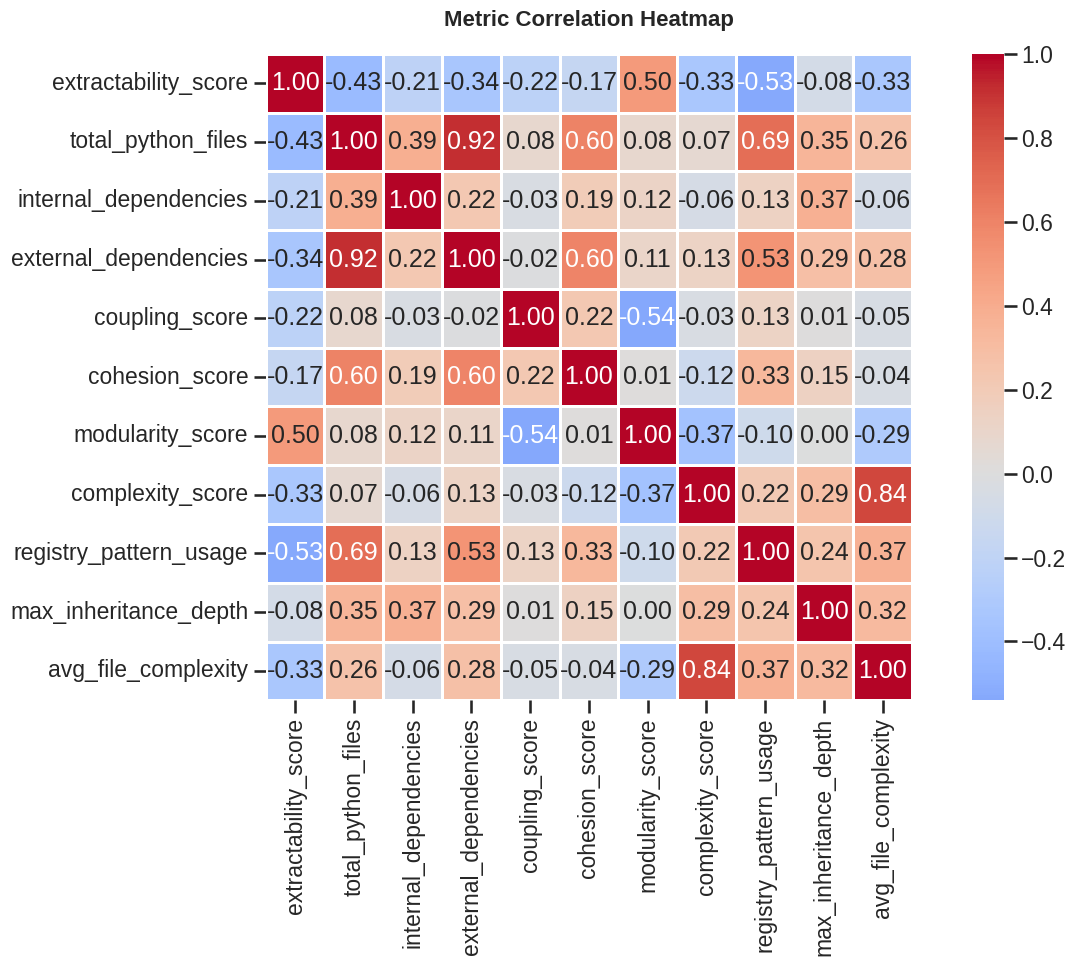

In [9]:
# Cell 9: Correlation Heatmap
print("=" * 80)
print("METRIC CORRELATIONS")
print("=" * 80)

# Select numeric columns for correlation
correlation_cols = [
    'extractability_score', 'total_python_files', 'internal_dependencies',
    'external_dependencies', 'coupling_score', 'cohesion_score',
    'modularity_score', 'complexity_score', 'registry_pattern_usage',
    'max_inheritance_depth', 'avg_file_complexity'
]

corr_matrix = df_success[correlation_cols].corr()

# Display top correlations with extractability
print("\nCorrelations with Extractability Score:")
extractability_corr = corr_matrix['extractability_score'].sort_values(ascending=False)
print(extractability_corr)

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Metric Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [10]:
# Cell 10: Framework Comparison (OpenMMLab vs Others)
print("=" * 80)
print("FRAMEWORK PATTERN ANALYSIS")
print("=" * 80)

# Identify OpenMMLab repos
df_success['is_openmm'] = df_success['repo_name'].str.contains('open-mmlab', case=False)

# Compare OpenMMLab vs others
framework_comparison = df_success.groupby('is_openmm').agg({
    'extractability_score': ['mean', 'median'],
    'registry_pattern_usage': 'mean',
    'modularity_score': 'mean',
    'coupling_score': 'mean',
    'has_config_system': 'sum'
}).round(2)

framework_comparison.index = ['Other Repos', 'OpenMMLab Repos']
print("\nOpenMMLab vs Other Repositories:")
print(framework_comparison)

# Identify Facebook Research repos
df_success['is_facebook'] = df_success['repo_name'].str.contains('facebook', case=False)

facebook_stats = df_success.groupby('is_facebook').agg({
    'extractability_score': ['mean', 'median'],
    'registry_pattern_usage': 'mean',
    'modularity_score': 'mean'
}).round(2)

facebook_stats.index = ['Other Repos', 'Facebook Research']
print("\n\nFacebook Research vs Other Repositories:")
print(facebook_stats)

# Top repos by organization
print("\n" + "=" * 80)
print("TOP REPOS BY MAJOR ORGANIZATIONS:")
print("=" * 80)

orgs = {
    'Facebook': 'facebook',
    'Microsoft': 'microsoft',
    'Google': 'google',
    'NVIDIA': 'NVIDIA',
    'Hugging Face': 'huggingface'
}

for org_name, org_pattern in orgs.items():
    org_repos = df_success[df_success['repo_name'].str.contains(org_pattern, case=False)]
    if len(org_repos) > 0:
        best = org_repos.nlargest(1, 'extractability_score').iloc[0]
        print(f"\n{org_name}:")
        print(f"  Best: {best['repo_name']} (Score: {best['extractability_score']:.2f})")
        print(f"  Avg: {org_repos['extractability_score'].mean():.2f}")
        print(f"  Count: {len(org_repos)}")


FRAMEWORK PATTERN ANALYSIS

OpenMMLab vs Other Repositories:
                extractability_score        registry_pattern_usage  \
                                mean median                   mean   
Other Repos                    39.71  39.38                 248.68   
OpenMMLab Repos                31.02  31.02                 427.00   

                modularity_score coupling_score has_config_system  
                            mean           mean               sum  
Other Repos                 0.48           0.28                59  
OpenMMLab Repos             0.51           0.27                 2  


Facebook Research vs Other Repositories:
                  extractability_score        registry_pattern_usage  \
                                  mean median                   mean   
Other Repos                      40.04  40.06                 242.08   
Facebook Research                35.48  37.13                 333.78   

                  modularity_score  
                 

In [11]:
# Cell 11: Key Insights Summary
print("=" * 80)
print("KEY INSIGHTS SUMMARY")
print("=" * 80)

print("\n🏆 MOST EXTRACTABLE CHARACTERISTICS:")
print("-" * 80)
print(f"✓ High Modularity (avg: {df_success.nlargest(10, 'extractability_score')['modularity_score'].mean():.3f})")
print(f"✓ Low Registry Usage (avg: {df_success.nlargest(10, 'extractability_score')['registry_pattern_usage'].mean():.1f})")
print(f"✓ Low Coupling (avg: {df_success.nlargest(10, 'extractability_score')['coupling_score'].mean():.3f})")
print(f"✓ Medium Size (avg: {df_success.nlargest(10, 'extractability_score')['total_python_files'].mean():.0f} files)")

print("\n⚠️  LEAST EXTRACTABLE CHARACTERISTICS:")
print("-" * 80)
print(f"✗ High Registry Usage (avg: {df_success.nsmallest(10, 'extractability_score')['registry_pattern_usage'].mean():.1f})")
print(f"✗ High Coupling (avg: {df_success.nsmallest(10, 'extractability_score')['coupling_score'].mean():.3f})")
print(f"✗ Low Modularity (avg: {df_success.nsmallest(10, 'extractability_score')['modularity_score'].mean():.3f})")
print(f"✗ Config Systems Present: {df_success.nsmallest(10, 'extractability_score')['has_config_system'].sum()}/10")

print("\n📊 CORRELATION STRENGTH WITH EXTRACTABILITY:")
print("-" * 80)
key_correlations = [
    ('modularity_score', 'Modularity'),
    ('registry_pattern_usage', 'Registry Usage'),
    ('coupling_score', 'Coupling'),
    ('cohesion_score', 'Cohesion'),
    ('complexity_score', 'Complexity')
]

for col, name in key_correlations:
    corr = df_success[col].corr(df_success['extractability_score'])
    direction = "↑ Positive" if corr > 0 else "↓ Negative"
    strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
    print(f"  {name:20s}: {corr:6.3f} ({direction}, {strength})")

print("\n🎯 SCORE DISTRIBUTION:")
print("-" * 80)
print(f"  Mean:   {df_success['extractability_score'].mean():.2f}")
print(f"  Median: {df_success['extractability_score'].median():.2f}")
print(f"  Std:    {df_success['extractability_score'].std():.2f}")
print(f"  Range:  {df_success['extractability_score'].min():.2f} - {df_success['extractability_score'].max():.2f}")

print("\n" + "=" * 80)

KEY INSIGHTS SUMMARY

🏆 MOST EXTRACTABLE CHARACTERISTICS:
--------------------------------------------------------------------------------
✓ High Modularity (avg: 0.554)
✓ Low Registry Usage (avg: 8.9)
✓ Low Coupling (avg: 0.295)
✓ Medium Size (avg: 272 files)

⚠️  LEAST EXTRACTABLE CHARACTERISTICS:
--------------------------------------------------------------------------------
✗ High Registry Usage (avg: 1081.3)
✗ High Coupling (avg: 0.341)
✗ Low Modularity (avg: 0.423)
✗ Config Systems Present: 10/10

📊 CORRELATION STRENGTH WITH EXTRACTABILITY:
--------------------------------------------------------------------------------
  Modularity          :  0.496 (↑ Positive, Moderate)
  Registry Usage      : -0.532 (↓ Negative, Strong)
  Coupling            : -0.216 (↓ Negative, Weak)
  Cohesion            : -0.168 (↓ Negative, Weak)
  Complexity          : -0.329 (↓ Negative, Moderate)

🎯 SCORE DISTRIBUTION:
--------------------------------------------------------------------------------
 

In [12]:
# Cell 12: Export Key Findings
# Create summary CSV with top/bottom repos
summary = pd.concat([
    df_success.nlargest(15, 'extractability_score').assign(category='Top 15 Most Extractable'),
    df_success.nsmallest(15, 'extractability_score').assign(category='Top 15 Least Extractable')
])

summary_export = summary[[
    'category', 'repo_name', 'extractability_score', 'total_python_files',
    'modularity_score', 'coupling_score', 'registry_pattern_usage', 
    'has_config_system', 'internal_dependencies', 'external_dependencies'
]]

summary_export.to_csv('extractability_summary.csv', index=False)
print("✓ Summary exported to 'extractability_summary.csv'")

# Also export full statistics
stats_summary = pd.DataFrame({
    'Metric': ['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Q1', 'Q3'],
    'Extractability Score': [
        df_success['extractability_score'].mean(),
        df_success['extractability_score'].median(),
        df_success['extractability_score'].std(),
        df_success['extractability_score'].min(),
        df_success['extractability_score'].max(),
        df_success['extractability_score'].quantile(0.25),
        df_success['extractability_score'].quantile(0.75)
    ]
})

stats_summary.to_csv('extractability_statistics.csv', index=False)
print("✓ Statistics exported to 'extractability_statistics.csv'")

print("\n📁 Files created:")
print("  - extractability_summary.csv (top/bottom 15 repos)")
print("  - extractability_statistics.csv (summary statistics)")

✓ Summary exported to 'extractability_summary.csv'
✓ Statistics exported to 'extractability_statistics.csv'

📁 Files created:
  - extractability_summary.csv (top/bottom 15 repos)
  - extractability_statistics.csv (summary statistics)
